In [1]:
import pandas as pd

# Cincinnati
Original data source was https://data.cincinnati-oh.gov/safety/PDI-Police-Data-Initiative-Police-Calls-for-Servic/gexm-h6bt/data
<br>filtered within portal for time range (2017 to 2021) and incident type (MHRT and MHRTV) prior to download from data portal

In [17]:
#read and inspect data 
df_cincinnati = pd.read_csv("data/cincinnati_cfs_mh_2017_2021.csv", usecols = ["CREATE_TIME_INCIDENT","INCIDENT_TYPE_ID"])
df_cincinnati.head()

,CREATE_TIME_INCIDENT,INCIDENT_TYPE_ID
0,11/15/2021 11:03:58 PM,MHRT
1,11/15/2021 10:42:59 PM,MHRTV
2,11/15/2021 10:05:22 PM,MHRTV
3,11/15/2021 04:41:00 PM,MHRT
4,11/15/2021 03:09:23 PM,MHRT


In [18]:
# inspect count of records
df_cincinnati["INCIDENT_TYPE_ID"].value_counts()

INCIDENT_TYPE_ID
MHRT     23970
MHRTV    16869
Name: count, dtype: int64

In [19]:
pct_violent = df_cincinnati["INCIDENT_TYPE_ID"].value_counts()['MHRTV']/len(df_cincinnati)
pct_violent

0.4130610445897304

# Detroit
Archived dataset retrieved from https://apis.detroitmi.gov/data/index.html

In [21]:
#read and inspect data
df_detroit = pd.read_csv("data/detroit_cfs.csv", usecols = ["call_timestamp", "category"])
df_detroit.head()

,category,call_timestamp
0,DISTURB,2016-09-20 05:36:12-04:00
1,ACCUNK,2016-09-20 05:46:32-04:00
2,RECAUTO,2016-09-20 05:48:24-04:00
3,DISTURB,2016-09-20 05:50:29-04:00
4,RECAUTO,2016-09-20 05:54:37-04:00


In [23]:
#filter for just 2017 to 2021
#filter just for Mental categories
df_detroit = df_detroit[(df_detroit['call_timestamp'] > '2017-01-01') & (df_detroit['call_timestamp'] < '2022-01-01')]
df_detroit = df_detroit.query("category in ('MNTLARM ','MNTLNARM','MENTPPRS')")

In [24]:
#write this to a new file
df_detroit.to_csv("data/detroit_cfs_mh_2017_2021.csv")

In [25]:
# inspect count of records
df_detroit["category"].value_counts()

category
MNTLNARM    21320
MENTPPRS    11841
MNTLARM      5894
Name: count, dtype: int64

In [28]:
n_violent = df_detroit["category"].value_counts()['MNTLNARM'] + df_detroit["category"].value_counts()['MNTLARM ']
pct_violent = n_violent/len(df_detroit)
pct_violent

0.6968121879400845

# Boston
Boston's mental health calls are routed through EMS. While Boston police provided data in response to a FOIA request, this did not include calls initially categorized as EDP3 which did not require police accompaniment.
<p>The denominator "psychological/suicidal" was obtained from <a href="https://www.boston.gov/sites/default/files/file/2022/04/2020-Vital-Stats-Boston-EMS.pdf" target="_blank">Boston Emergency Medical Services 2020 Vital Statistics</a>. Proportions of EDP2 (emotionally disturbed person, potential for violence) and EDP3 (emotionally disturbed person, no indication of violence) were estimated based on the city's <a href="https://www.boston.gov/sites/default/files/file/2021/08/Mental%20Health%20Call_Data%20Brief_FINAL_LB_edit.pdf" target="_blank">Mental Health Emergency Calls Data Brief</a>

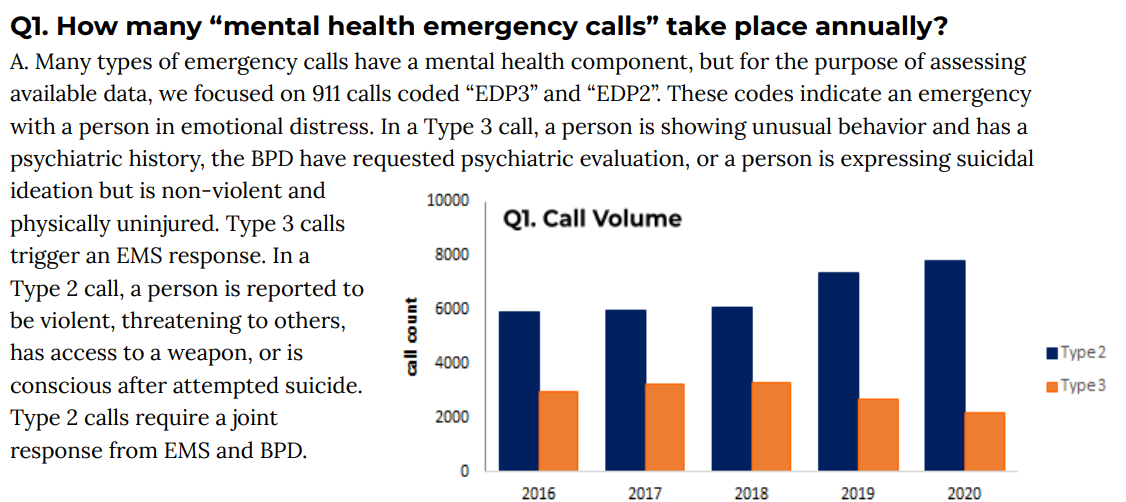

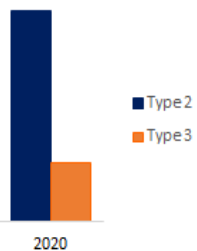

In [31]:
#2020 estimated total # of calls, based on bar chart
#this figure corroborates the 10,079 figure indicated in EMS vital statistics
type2 = 8000
type3 = 2000
print (type2 + type3)

10000


In [33]:
#proportion of EDP2 (potential for violence) based on ruled measurement in millimeters.
#This is a very rough estimate, but we can safely round off to 4 out of 5
EDP2 = 33
EDP3 = 9
pct_violent = EDP2/(EDP2 + EDP3)
pct_violent

0.7857142857142857